In [2]:
import torch
import streamlit as st
from PIL import Image
import os
import matplotlib.pyplot as plt
from torchvision.io import read_image
import torchvision.transforms as T
from PIL import Image

In [4]:
# !git clone https://github.com/ultralytics/yolov5  # clone
# %cd yolov5
# %pip install -qr requirements.txt  # install


In [18]:
model = torch.hub.load(
    # будем работать с локальной моделью в текущей папке
    repo_or_dir = '/home/xuri/cv_project/yolov5', # путь в папку yolov5
    # непредобученная – будем подставлять свои веса
    model = 'custom',
    # путь к нашим весам
    path='/home/xuri/cv_project/yolov5/models/best (1).pt', # весь путь к весам (внутри yolo должны быть)
    # откуда берем модель – наша локальная
    source='local'
    )

YOLOv5 🚀 v7.0-376-gbcd88eaf Python-3.10.15 torch-2.5.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 1761871 parameters, 0 gradients, 4.1 GFLOPs
Adding AutoShape... 


/home/xuri/cv_project/yolov5/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


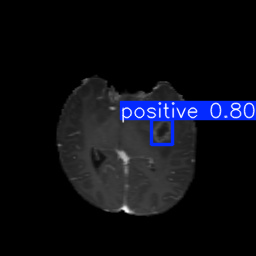

In [19]:
# Начиная с какой вероятности отрисовывать детекции
model.conf = 0.3
# Читаем картинку
img = T.ToPILImage()(read_image('/home/xuri/cv_project/yolov5/data/images/test/00019_66.jpg'))
model.eval()
with torch.inference_mode():
    results = model(img)
# results.show()  # or .show(), .save(), .crop(), .pandas(), render(), etc
results.show()

In [23]:

# 2 СПОСОБ: (ОСТАВЛЮ ДЛЯ СЕБЯ)
    # Загружаем изображение
    # image = Image.open(uploaded_file)
    # # Преобразуем изображение в формат NumPy
    # image = np.array(image)
    # # Выполняем детекцию объектов
    # results = detect_objects(image, model)
    # # Отображаем результат
    # display_results(image, results)
# def process_image(image, model):
#     try:
#         with torch.no_grad():
#             results = model(image)
#             return results.show()
#     except Exception as e:
#         st.error(f"Ошибка обработки изображения: {e}")
#         return None
#   ЗАГРУЗКА НЕСКОЛЬКИХ ФАЙЛОВ И ФАЙЛОВ ПО ССЫЛКЕ
# def main():
#     st.title("Загрузка и детекция объектов")

#     uploaded_files = st.file_uploader("Выберите файлы", accept_multiple_files=True)
#     url = st.text_input('Введите ссылку на изображение:')

#     if uploaded_files is not None:
#         for file in uploaded_files:
#             if file.type == 'image/jpeg' or file.type == 'image/png':
#                 try:
#                     image = Image.open(io.BytesIO(file.read())).convert('RGB')
#                     image = np.array(image)
#                     process_image(image, model)
#                 except Exception as e:
#                     st.error(f"Ошибка в предсказании для файла {file.name}: {e}")
#             else:
#                 st.warning("Файл не является изображением.")
#             st.write("---")
    # if url is not None:
    #     for file in url:
    #         if file.type == 'image/jpeg' or file.type == 'image/png':
    #             try:
    #                 image = Image.open(io.BytesIO(file.read())).convert('RGB')
    #                 image = np.array(image)
    #                 process_image(image, model)
    #             except Exception as e:
    #                 st.error(f"Ошибка в предсказании для файла {file.name}: {e}")
    #         else:
    #             st.warning("Файл не является изображением.")
    #         st.write("---")
#     display_model_parameters()  # Отображение параметров модели
# if __name__ == "__main__":
#     #if model is None:
#     #    st.stop()
#     main()